# Machine Learning & Statistics Assessment 2019

This assignment is to analyse the well-known Boston Housing Dataset and is broken in to 3 sections :

1) Describe:
    - Use descriptive statistics and plots to describe the Boston House Prices dataset
    
2) Infer:
    - User inferentials statistics to analyse if there is a significant difference in median house prices between houses along the Charles river and those that are not.
    
3) Predict:
    - Create a neural network that can predict the median house price based on the other dataset variables 
    
(All above from - file:///C:/Users/shaun/Downloads/project%20(2).pdf)

In [52]:
# Importing libraries required for various analysis
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Uses dataset preloaded in to scikit learn
# Reference - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_bostonS
# Reference - https://scikit-learn.org/stable/datasets/index.html

from sklearn.datasets import load_boston

from scipy.stats import ttest_ind
import scipy.stats as stats

import sklearn.decomposition as dec

import keras as kr
import sklearn.preprocessing as pre
import sklearn.model_selection as mod
from keras import models, layers

Using TensorFlow backend.


In [4]:
# Loads the dataset and assigns it to the variable name boston
boston = load_boston()

## Descriptive Statistics

In [5]:
# Review the shape of the loaded dataset to determine if it has loaded correctly
print(boston.data.shape)

(506, 13)


### Attribute information in column order for the dataset loaded - 

- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per 10,000 dollars
- PTRATIO pupil-teacher ratio by town
- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT Percentage lower status of the population
- MEDV Median value of owner-occupied homes in 1000’s dollars

In [106]:
#Takes the category from each column header
attributes = boston.feature_names 
print(attributes)

#It can be seen from this that MEDV is currently not included in the loaded boston dataframe and will need to be added

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Creates a dataframe to included loaded dataset and MEDV column which also includes the header row with the feature names
df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
df['MEDV'] = boston['target']
medv = df['MEDV'].copy()
del df['MEDV']
df = pd.concat((medv, df), axis=1)

In [12]:
#Gives an overview of the data included in the dataset, the attribute information and where the dataset has been resourced from
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [14]:
#Head overview of the dataset
df.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
#Tail overview of the dataset
df.tail()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,22.4,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,20.6,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,23.9,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,22.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,11.9,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [16]:
#Checks for any NULL values in any of the attribute columns in the dataset to see if data cleaning is required
df.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [17]:
#Overview descriptive statistics for each of the attribute columns contained in the dataset in a table format
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MEDV,506.0,22.532806,9.197104,5.00000,17.025000,21.20000,25.000000,50.0000
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000


In [18]:
#Checks the correlation coefficients to observe relationships between the attributes in the dataset
df.corr()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,1.000000,-0.388305,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663
CRIM,-0.388305,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,0.360445,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.483725,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175260,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.427321,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.695360,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.376955,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249929,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.381626,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


(14.0, 0.0)

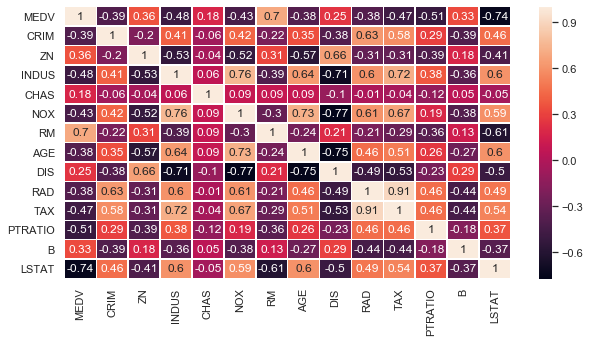

In [19]:
#Produces a heatmap to provide an easier view of the relationships to the above correlation co-efficient table produced
sns.set(rc={'figure.figsize':{10,5}})
data = df.corr().round(2)
mapAll = sns.heatmap(data, annot=True, linewidths=.5)
bottom, top = mapAll.get_ylim()
mapAll.set_ylim(bottom + 0.5, top - 0.5)

As the median house price is the target data in this analysis we will review the relationships closely correlated to this attribute :

- LSTAT -> -0.74

- RM -> 0.7

- PTRATIO -> -0.51

- INDUS -> -0.48

- TAX -> -0.47

(6.0, 0.0)

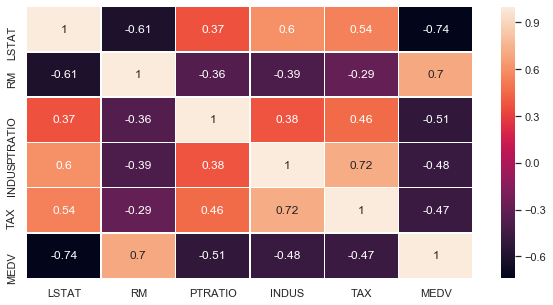

In [23]:
cols = ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'MEDV']

#Re-do of correlation co-efficient heatmap for better visualisation of these chosen attributes
sns.set(rc={'figure.figsize':{10,5}})
data = df[cols].corr().round(2)
map = sns.heatmap(data, annot=True, linewidths=.5)
bottom, top = map.get_ylim()
map.set_ylim(bottom + 0.5, top - 0.5)

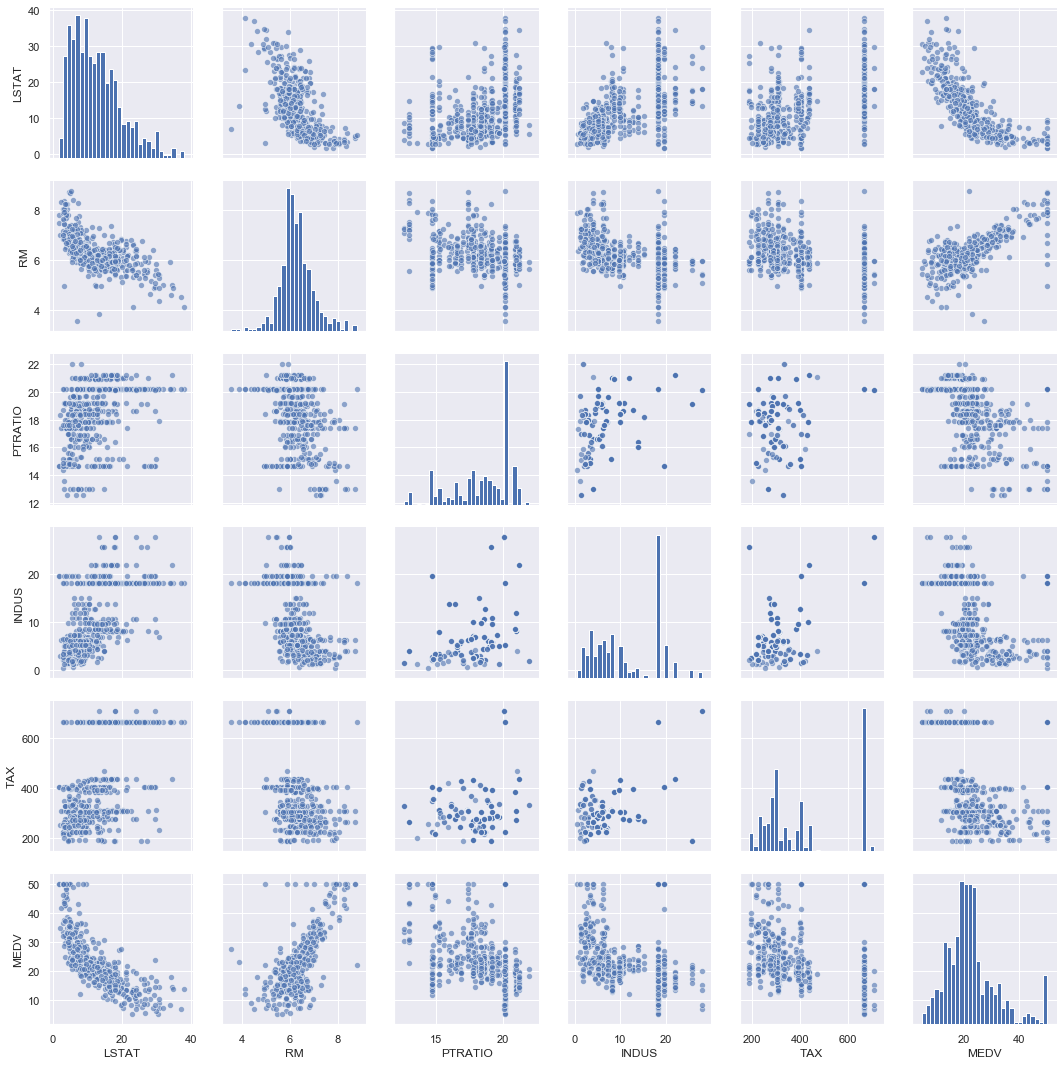

In [24]:
#Visualisation of attributes
sns.pairplot(df[cols], plot_kws={'alpha': 0.6}, diag_kws={'bins': 30})

- RM and MEDV columns appear closest to normal distributions in shape

- CHAR, AGE and LSTAT all appear skewed in shape


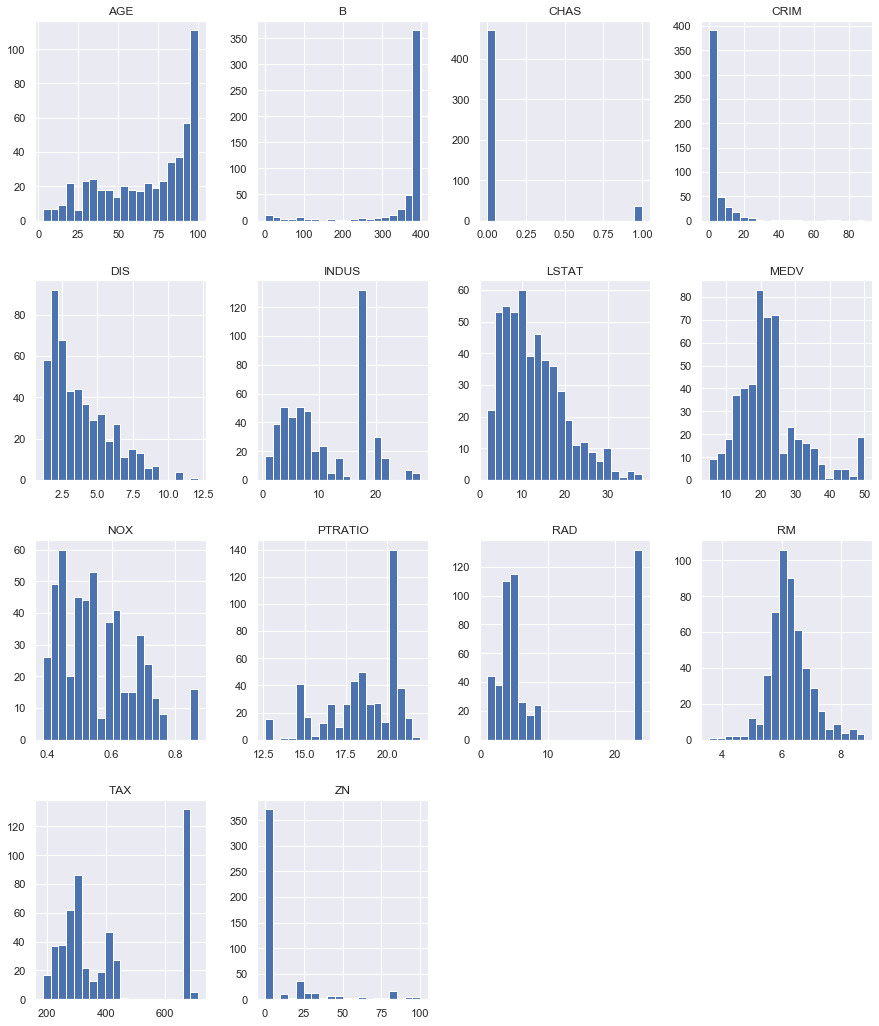

In [102]:
# Histogram visuals only of each of the attributes in the dataset

#df.hist(bins=20, figsize=(10,5))
df.hist(bins=20, figsize=(15,18))
plt.show()

## Inferential Statistics

In [25]:
#Median of overall Median House Price column
MEDV = df[['MEDV']]
MEDV_mean = np.mean(df[['MEDV']])
print(MEDV_mean)

MEDV    22.532806
dtype: float64


In [26]:
# Divides the MEDV in to 2 pandas Dataframes depending on CHAS variable value, 0 or 1
#CHAS=1 if tract bounds the river
#CHAS=0 if tract does not bound the river

#CHAS=1 dataframe
isBound = df['CHAS']==1
#Creates a dataframe from this selection of information
BoundDF = df[isBound]
#Checks the shape of the dataframe
print(BoundDF.shape)
#Prints the MEDV values where CHAS=1
#print(BoundDF['MEDV'])

(35, 14)


This output indicates there are 35 rows of data within the boston housing dataset that tract the Charles river

In [27]:
#Assigns the MEDV column in the bound dataset to the variable boundMEDV and checks the type
boundMEDV = BoundDF['MEDV']
type(boundMEDV)

pandas.core.series.Series

In [29]:
## Store 2nd dataframe for non-bound MEDV values
notBound = df['CHAS']==0
notBoundDF = df[notBound]
print(notBoundDF.shape)
#print(notBoundDF['MEDV'])

(471, 14)


This output indicates there are 471 rows of data within the boston housing dataset that tract the Charles river

In [32]:
#Assigns the MEDV column in the not bound dataset to the variable notBoundMEDV and checks the type
notBoundMEDV = notBoundDF['MEDV']
type(notBoundMEDV)

pandas.core.series.Series

In [33]:
#Descriptive statistics for the bound MEDV values
boundMEDV.describe()

count    35.000000
mean     28.440000
std      11.816643
min      13.400000
25%      21.100000
50%      23.300000
75%      33.150000
max      50.000000
Name: MEDV, dtype: float64

In [34]:
#Descriptive statistics for the not bound MEDV values
notBoundMEDV.describe()

count    471.000000
mean      22.093843
std        8.831362
min        5.000000
25%       16.600000
50%       20.900000
75%       24.800000
max       50.000000
Name: MEDV, dtype: float64

- The max median house value is 50 not dependent on whether the house bounds the Charles river or not

- However, the minimum when not bound, 5, is a lot lower than the minimum when the house does bound the Charles river, 13. Which may infer an impact of the CHAS variable on MEDV.

- The means are fairly similar at roughly 28.5 and 22, therefore it appears the CHAS variable does not have too much of an impact on the mean of the median house prices

In [36]:
# https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce
# Two sampled T-test

boundMean = boundMEDV.mean()
notBoundMean = notBoundMEDV.mean()

print("Bound MEDV mean value:",boundMean)
print("Not Bound MEDV mean value:",notBoundMean)

boundSTD = boundMEDV.std()
notBoundSTD = notBoundMEDV.std()

print("Bound MEDV std value:",boundSTD)
print("Not Bound MEDV std value:",notBoundSTD)

ttest,pval = ttest_ind(boundMEDV, notBoundMEDV)
print("p-value",pval)

if pval <0.05:
  print("\nWe reject null hypothesis")
else:
  print("\nWe accept null hypothesis")

Bound MEDV mean value: 28.44
Not Bound MEDV mean value: 22.093842887473482
Bound MEDV std value: 11.816643297634458
Not Bound MEDV std value: 8.831362409577903
p-value 7.390623170519905e-05

We reject null hypothesis


Rejecting the null hypothesis infers that there is a relationship between the two measured groups

Two sampled T-test :-The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test.
(https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce)

In [39]:
# ANOVA

t_test = stats.ttest_ind(boundMEDV, notBoundMEDV)
print(t_test)

if t_test.pvalue<0.05:
    print("\nReject null hypothesis")
else:
    print("\nAccept null hypothesis")
    
# https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/    
#Analysis of Variance Test (ANOVA)
#Tests whether the means of two or more independent samples are significantly different.

#Assumptions
#Observations in each sample are independent and identically distributed (iid).
#Observations in each sample are normally distributed.
#Observations in each sample have the same variance.

#Interpretation
#H0: the means of the samples are equal.
#H1: one or more of the means of the samples are unequal.

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

Reject null hypothesis


### Analysis :

Independent sample t-tests assume that there is a given difference between the means of 2 populations, usually 0.

We then ask, given the hypothesised difference (usually zero) what was the probability of seeing a t-statistic at least this extreme.

If it's too extreme (say, less that 5% chance of seeing it) then we say our hypothesis about the difference must be wrong.

https://nbviewer.jupyter.org/github/ianmcloughlin/jupyter-teaching-notebooks/blob/master/anova.ipynb

https://www.statisticallysignificantconsulting.com/Anova.htm

The null hypothesis for ANOVA is that the mean (average value of the dependent variable) is the same for all groups. The alternative or research hypothesis is that the average is not the same for all groups. The ANOVA test procedure produces an F-statistic, which is used to calculate the p-value.

### Result :
Reject null hypothesis = means are not the same for the groups

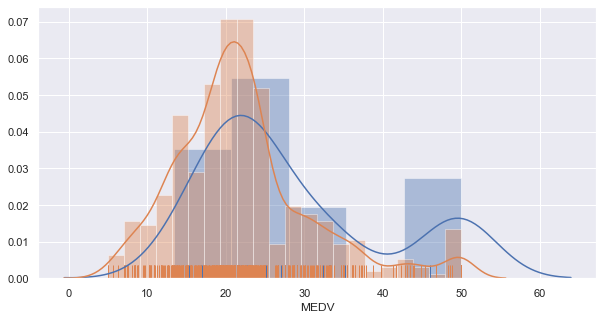

In [110]:
#Plots a distplot comparing the MEDV  values where CHAS is 0 and CHAS is 1
boundFig = sns.distplot(boundMEDV, hist=True, rug=True)
notBoundFig = sns.distplot(notBoundMEDV, hist=True, rug=True)

plt.show()

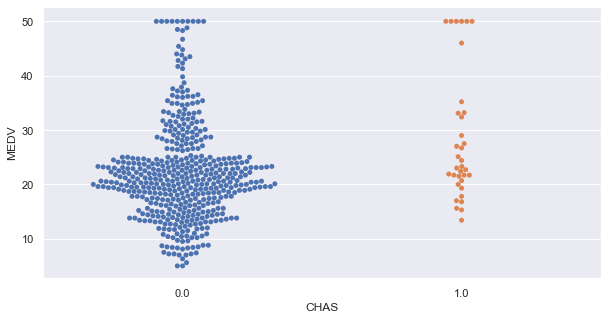

In [43]:
#Plots a swarmplot to comparing the MEDV distribution of values where CHAS is 0 and CHAS is 1
sns.swarmplot(x="CHAS", y="MEDV", data=df)
plt.show()

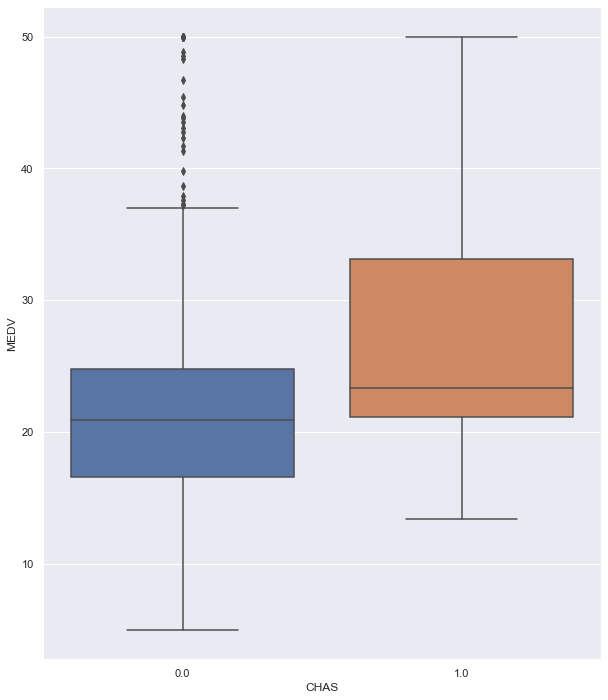

In [115]:
#Plots a boxplot to comparing the MEDV distribution of values where CHAS is 0 and CHAS is 1
sns.set(rc={'figure.figsize':{10,12}})
sns.boxplot(x="CHAS", y="MEDV", data=df)
plt.show()

In [44]:
# Shapiro-Wilk Test
# Tests if the data same has a Gaussian distribution or not

# https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

#Interpretation
#H0: the sample has a Gaussian distribution.
#H1: the sample does not have a Gaussian distribution.

#Assumptions
#Observations in each sample are independent and identically distributed (iid).

from scipy.stats import shapiro

stat, p = shapiro(boundMEDV)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.836, p=0.000
Probably not Gaussian


### Result

Neither set of data is Gaussian in shape

In [45]:
#Chi-Squared Test
#Tests whether two categorical variables are related or independent.

#Assumptions
#Observations used in the calculation of the contingency table are independent.
#25 or more examples in each cell of the contingency table.

#Interpretation
#H0: the two samples are independent.
#H1: there is a dependency between the samples.

from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(boundMEDV, notBoundMEDV)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.000, p=1.000
Probably independent


## Keras Neural Network

In [46]:
inputs = df.loc[:, df.columns != 'MEDV']
inputs

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [47]:
outputs = df[['MEDV']]
outputs

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [50]:
#Check resource - think lecture videos
#Whitens data

pca = dec.PCA(n_components=13, whiten=True)
pca.fit(inputs)
inputsWhite = pd.DataFrame(pca.transform(inputs), columns=inputs.columns)
inputsWhite 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.681737,-0.070328,-0.110906,0.324032,-0.257641,-1.195502,-0.257642,1.774739,-1.069788,-0.302890,0.749064,-0.290887,0.606963
1,-0.960939,0.127958,-1.076024,0.079408,0.052369,-0.613999,-0.156852,0.296642,0.258499,1.196095,0.096360,-0.386434,-0.599819
2,-0.963338,0.178102,-0.585647,-0.629399,-0.013232,-1.119363,0.428840,0.165237,0.229360,0.837983,-0.925444,-0.437518,-0.081586
3,-1.082361,0.231504,-0.228412,-1.202960,0.214394,-1.318206,-0.491872,0.274068,0.587810,0.887470,-0.546818,-0.214018,0.790989
4,-1.081808,0.203619,-0.459975,-0.868201,0.249464,-1.091127,-0.763402,0.334618,0.587477,1.033557,-1.065225,-0.225982,0.643021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.789154,0.073129,-0.733316,-0.349447,-0.068129,0.027581,0.942339,0.108110,1.608370,-1.555624,-0.638012,-0.258742,1.083075
502,-0.793743,0.013147,-0.936627,-0.053825,-0.127177,-0.216900,0.946965,0.140667,1.715690,-1.508870,0.471572,-0.268371,0.831583
503,-0.787386,0.011866,-1.303356,0.494394,-0.335579,-1.104183,1.171877,0.195967,2.005277,-1.241822,-0.589854,-0.426902,0.779639
504,-0.782367,0.053780,-1.258023,0.429652,-0.297891,-0.930280,1.104906,0.202194,1.984588,-1.094030,-0.384357,-0.389392,0.816168


In [53]:
#Splits the dataset in to train and test for inputs and outputs
x_train, x_test, y_train, y_test = mod.train_test_split(inputsWhite, outputs, test_size=0.5)

In [54]:
# Applies a scale to both the inputs train and test sets defined in the previous cell
scaler = pre.StandardScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Prints the scaled inputs trained values to ensure they are calculating correctly
print(x_train_scaled[0])

[ 1.53245603 -1.47703887 -0.00993666  0.08822934 -2.02840516  1.6497328
  3.46641756  3.57408709  0.76236105 -0.10959705 -0.14256949 -0.02984998
 -1.27360761]


In [56]:
#Creates the neural network and builds the appropriate layers
model = models.Sequential()

# Hidden layer with 13 neurons and an input layer 13
model.add(layers.Dense(13, activation='relu', input_dim=13))
model.add(layers.Dense(26, activation='relu'))
#model.add(layers.Dense(26, activation='linear'))
# Single output layer for MEDV prediction
model.add(layers.Dense(1, activation='relu'))

# RMSprop optimizer increases learning rate of the neural network
# MAE includes the mean_absolute error in the metrics for later evaluation
model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mean_absolute_error', 'acc'])

In [87]:
# Trains the neural network
history = model.fit(x_train_scaled, y_train, validation_split=0.2, epochs=100)

Train on 202 samples, validate on 51 samples
Epoch 1/100
202/202 [==============================] - 0s 39us/step - loss: 1.7800 - mean_absolute_error: 1.0639 - acc: 0.0297 - val_loss: 13.2032 - val_mean_absolute_error: 2.9649 - val_acc: 0.0196
Epoch 2/100
202/202 [==============================] - 0s 30us/step - loss: 1.8530 - mean_absolute_error: 1.0810 - acc: 0.0396 - val_loss: 12.3790 - val_mean_absolute_error: 2.7895 - val_acc: 0.0196
Epoch 3/100
202/202 [==============================] - 0s 30us/step - loss: 1.7627 - mean_absolute_error: 1.0548 - acc: 0.0396 - val_loss: 12.3439 - val_mean_absolute_error: 2.7885 - val_acc: 0.0196
Epoch 4/100
202/202 [==============================] - 0s 30us/step - loss: 1.7592 - mean_absolute_error: 1.0583 - acc: 0.0446 - val_loss: 12.4303 - val_mean_absolute_error: 2.8153 - val_acc: 0.0196
Epoch 5/100
202/202 [==============================] - 0s 30us/step - loss: 1.7448 - mean_absolute_error: 1.0471 - acc: 0.0446 - val_loss: 12.0405 - val_mean_a

In [88]:
# Evaluates the Mean Squared Error, Mean Absolute Error and Accuracy metric values
model.evaluate(x_test_scaled, y_test)

253/253 [==============================] - 0s 12us/step


[23.557916437684312, 3.3259473534911987, 0.011857707495156956]

In [89]:
# Selects the first 2 values from the training data to make a prediction
to_predict = x_train_scaled[:2]
predictions = model.predict(to_predict)
# Prints the predicted values
print(predictions)

[[14.92592]
 [24.25475]]


In [90]:
# Prints the actual values from the first 2 values from the MEDV training output set for comparison
print(y_train[:2])

     MEDV
488  15.2
0    24.0


In [104]:
#Complete predictions
completePredictions = model.predict(x_train_scaled)

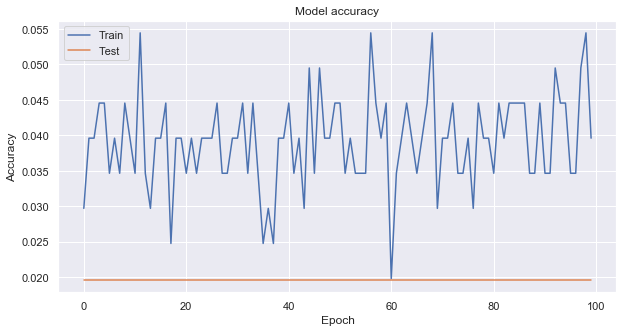

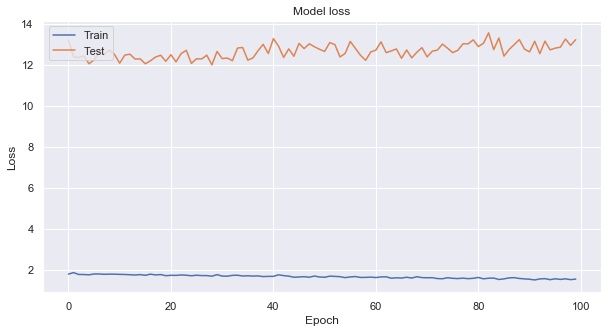

In [91]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Loss Values upon each training of the model:

- 9.7478
- 6.2192
- 4.3797
- 2.9892
- 2.2919
- 1.7733
- 1.5354

In [105]:
# Comparison of the first 10 rows of data from predicted values and true values

original = df[['MEDV']]
print ("Original values were :\n", original[:10])

predicted = completePredictions
print ("Predicted values were :\n", completePredictions[:10])

Original values were :
    MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2
5  28.7
6  22.9
7  27.1
8  16.5
9  18.9
Predicted values were :
 [[14.925919]
 [24.25475 ]
 [26.850311]
 [35.048595]
 [20.44624 ]
 [14.643813]
 [25.072727]
 [18.355938]
 [18.392931]
 [18.941957]]
